# Informações Sobre os Dados

Retirado de http://www.dpi.inpe.br/prodesdigital/municipios.html

As estimativas de desflorestamento por município foram obtidas a partir do cruzamento do mapa de Municípios de 2007, escala 1:2.500.000 do IBGE, com dados de desmatamento do PRODES, relativos aos anos de 2000 a 2018.

Para cada ano de mapeamento PRODES foram gerados mosaicos no formato geotiff cuja resolução espacial original é de 30 x 30 metros. Após a geração dos mosaicos anuais, foi utilizado uma função do Sistema de TerraView que contou os "pixels" de cada classe  mapeada pelo PRODES (desmatamento, floresta, não floresta, hidrografia e nuvem) dentro de cada município, gerando uma tabela no banco de dados. Posteriormente esta quantidade de "pixels" por município foi convertida em área em Km2 (fórmula abaixo), gerando uma segunda tabela no banco.


$AreaKm^{2} = \left ( \frac{NrPixel \times 302}{1000000} \right )$
 
A estimativa de extensão desmatada por município baseia-se no cálculo do desmatamento acumulado e observado até o ano selecionado dentro dos limites administrativos  dos municípios que fazem parte da Amazônia Legal. Além da classe com a extensão desflorestada, as áreas de outras classes de cobertura da terra  e nuvem, foram calculadas  para cada ano de análise como: floresta, nuvem, não floresta, hidrografia e área não observada. A classe “área não observada”  se refere às áreas cuja cenas Landsat TM foram descartadas pelo PRODES em um determinado ano, devido ao excesso de nuvens (aprox. 75% da cena coberta de nuvens sobre área de floresta) ou à baixa qualidade radiométrica ou ainda  devido à extrapolação dos limites da Amazônia Legal, como é o caso do Estado do Maranhão, que apresenta vários municípios cujos limites ultrapassam o Meridiano 44 oeste, que define a região.

Para analisar o desmatamento e sua dinâmica em um município, recomenda-se analisar não apenas os dados relativos ao desflorestamento, mas também os dados relativos às classes de cobertura da terra (floresta, não floresta, hidrografia), nuvens e áreas não observadas, para cada ano de interesse, pois a área de algumas dessas classes pode variar ao longo dos anos devido à presença de nuvens e de outros fatores inerentes à metodologia utilizada na geração dos dados.

Um fator importante é a variação no número de imagens que foram utilizadas em cada levantamento que é variável em função da disponibilidade de imagens sem cobertura de nuvens. Por exemplo há um grande aumento no número de imagens no ano de 2001 em relação ao de 2000. Deste modo a extensão de desmatamento em 2000 não é comparável aos anos posteriores sem levar em conta este aumento no número de imagens. Observa-se que a variação na área coberta por imagens não interfere no cálculo da taxa de desmatamento.

Como são produzidos com metedologias distintas, há diferenças entre os dados aqui apresentados e as "Estimativas Anuais das Taxas de Desflorestamento da Amazônia Legal" publicadas anualmente pelo INPE/OBT. Mais detalhes sobre o cálculo desta taxa em: www.obt.inpe.br/prodes/apresentacao_prodes.ppt

# Instalando Bibliotecas Adicionais

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip &> /dev/null

# Importando Bibliotecas

In [ ]:
import altair as alt
import numpy as np
import pandas as pd
from ipywidgets import interact
from pandas_profiling import ProfileReport
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
from typing import List, Union

# Carregando os Dados

In [ ]:
df_desmat = pd.read_csv(
    f'https://raw.githubusercontent.com/george-gca/MO826_IA368_CF044/main/data/processed/dados_desmatamento.csv')

df_desmat

,Lat,Long,Municipio,Estado,AreaKm2,Desmatado2008,Incremento20072008,Floresta2008,NaoFloresta2008,Hidrografia2008,Desmatado2009,Incremento20082009,Floresta2009,NaoFloresta2009,Hidrografia2009,Desmatado2010,Incremento20092010,Floresta2010,NaoFloresta2010,Hidrografia2010,Desmatado2011,Incremento20102011,Floresta2011,NaoFloresta2011,Hidrografia2011,Desmatado2012,Incremento20112012,Floresta2012,NaoFloresta2012,Hidrografia2012,Desmatado2013,Incremento20122013,Floresta2013,NaoFloresta2013,Hidrografia2013,Desmatado2014,Incremento20132014,Floresta2014,NaoFloresta2014,Hidrografia2014,Desmatado2015,Incremento20142015,Floresta2015,NaoFloresta2015,Hidrografia2015,Desmatado2016,Incremento20152016,Floresta2016,NaoFloresta2016,Hidrografia2016,Desmatado2017,Incremento20162017,Floresta2017,NaoFloresta2017,Hidrografia2017,Desmatado2018,Incremento20172018,Floresta2018,NaoFloresta2018,Hidrografia2018,Desmatado2019,Incremento20182019,Floresta2019,NaoFloresta2019,Hidrografia2019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019
0,-3.25303,-45.97435,Zé Doca,MA,2438,1953.9,3.6,114.9,0.0,0.0,1986.1,32.3,380.9,0.0,0.0,1991.9,5.8,380.3,0.0,0.0,2003.3,11.4,433.7,0.0,0.0,2005.1,1.8,189.7,0.0,0.0,2009.9,4.8,183.9,0.0,0.0,2016.0,6.1,355.1,0.0,0.0,2016.8,0.8,376.1,0.0,0.0,2019.2,2.5,389.4,0.0,0.0,2019.9,0.7,404.6,0.0,0.0,2020.5,0.6,43.9,0.0,0.0,2021.6,1.1,376.2,0.0,0.0,0.801436,0.814643,0.817022,0.821698,0.822436,0.824405,0.826907,0.827235,0.828220,0.828507,0.828753,0.829204
1,-6.84864,-49.25551,Xinguara,PA,3793,3363.2,4.8,412.2,0.0,17.6,3367.6,4.4,407.8,0.0,17.6,3371.3,3.7,401.1,0.0,17.6,3372.1,0.8,403.0,0.0,17.6,3373.6,1.4,401.5,0.0,17.6,3374.2,0.7,401.0,0.0,17.6,3376.4,2.2,396.9,0.0,17.6,3377.5,1.1,397.4,0.0,17.6,3377.7,0.2,397.7,0.0,17.6,3379.0,1.3,396.4,0.0,17.6,3379.8,0.9,311.0,0.0,17.6,3381.1,1.2,394.3,0.0,17.6,0.886686,0.887846,0.888822,0.889032,0.889428,0.889586,0.890166,0.890456,0.890509,0.890852,0.891062,0.891405
2,-10.61178,-68.46285,Xapuri,AC,5511,1257.3,23.8,4253.2,0.0,0.0,1264.7,7.4,4245.2,0.0,0.0,1270.5,5.8,4239.7,0.0,0.0,1285.9,15.4,4224.2,0.0,0.0,1304.7,18.8,4200.5,0.0,0.0,1315.8,11.1,4189.1,0.0,0.0,1334.8,19.0,4175.2,0.0,0.0,1353.1,18.3,4157.9,0.0,0.0,1387.1,34.0,4114.8,0.0,0.0,1409.4,22.4,4101.6,0.0,0.0,1435.8,26.4,3907.7,0.0,0.0,1498.1,62.3,4012.9,0.0,0.0,0.228144,0.229486,0.230539,0.233333,0.236745,0.238759,0.242206,0.245527,0.251697,0.255743,0.260533,0.271838
3,-6.59866,-48.48198,Xambioá,TO,1191,977.5,7.8,172.3,11.0,30.1,980.8,3.3,169.0,11.0,30.1,987.3,6.5,162.3,11.0,30.1,988.9,1.7,156.7,11.0,30.1,990.2,1.3,139.1,11.0,30.1,990.4,0.2,128.6,11.0,30.1,994.6,4.2,155.2,11.0,30.1,996.2,1.6,153.7,11.0,30.1,998.2,2.0,151.7,11.0,30.1,998.8,0.6,151.1,11.0,30.1,999.4,0.6,149.5,11.0,30.1,999.9,0.5,150.0,11.0,30.1,0.820739,0.823510,0.828967,0.830311,0.831402,0.831570,0.835097,0.836440,0.838119,0.838623,0.839127,0.839547
4,-6.88444,-47.99094,Wanderlândia,TO,1382,314.6,2.4,146.6,920.8,0.0,314.7,0.1,146.5,920.8,0.0,315.1,0.4,146.0,920.8,0.0,315.7,0.6,144.2,920.8,0.0,315.7,0.0,145.4,920.8,0.0,315.9,0.2,145.2,920.8,0.0,316.2,0.3,145.0,920.8,0.0,316.6,0.3,144.6,920.8,0.0,317.8,1.3,143.4,920.8,0.0,317.9,0.1,143.3,920.8,0.0,318.1,0.2,143.1,920.8,0.0,318.7,0.6,142.5,920.8,0.0,0.227641,0.227713,0.228003,0.228437,0.228437,0.228582,0.228799,0.229088,0.229957,0.230029,0.230174,0.230608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,-2.03379,-48.31904,Acará,PA,4361,2263.7,47.9,1971.3,43.3,70.5,2276.0,12.3,1873.3,43.3,70.5,2306.8,30.8,1497.0,43.3,70.5,2321.9,15.1,1430.5,43.3,70.5,2326.9,5.0,994.3,43.3,70.5,2344.9,17.9,1590.8,43.3,70.5,23

In [ ]:
df_desmat_ano = pd.read_csv(
    f'https://raw.githubusercontent.com/george-gca/MO826_IA368_CF044/main/data/processed/dados_desmatamento_col_ano.csv')

df_desmat_ano

,Lat,Long,Municipio,Estado,AreaKm2,Ano,Desmatado,Incremento,Floresta,NaoFloresta,Hidrografia,PercDesmatado
0,-3.25303,-45.97435,Zé Doca,MA,2438,2008,1953.9,3.6,114.9,0.0,0.0,0.801436
1,-6.84864,-49.25551,Xinguara,PA,3793,2008,3363.2,4.8,412.2,0.0,17.6,0.886686
2,-10.61178,-68.46285,Xapuri,AC,5511,2008,1257.3,23.8,4253.2,0.0,0.0,0.228144
3,-6.59866,-48.48198,Xambioá,TO,1191,2008,977.5,7.8,172.3,11.0,30.1,0.820739
4,-6.88444,-47.99094,Wanderlândia,TO,1382,2008,314.6,2.4,146.6,920.8,0.0,0.227641
...,...,...,...,...,...,...,...,...,...,...,...,...
9115,-2.03379,-48.31904,Acará,PA,4361,2019,2421.3,18.3,1825.9,43.3,70.5,0.555217
9116,-4.70208,-47.22036,Açailândia,MA,5846,2019,5349.6,10.3,496.4,0.0,0.0,0.915087
9117,-9.46606,-49.33901,Abreulândia,TO,1900,2019,9.9,0.0,45.8,1844.3,0.0,0.005211
9118,-4.96265,-48.39406,Abel Figueiredo,PA,616,2019,571.9,4.2,44.1,0.0,0.0,0.928409


In [ ]:
df_desmat_estados = pd.read_csv(
    f'https://raw.githubusercontent.com/george-gca/MO826_IA368_CF044/main/data/processed/dados_desmatamento_estado.csv')

df_desmat_estados

,Estado,AreaKm2,Desmatado2008,Incremento20072008,Floresta2008,NaoFloresta2008,Hidrografia2008,Desmatado2009,Incremento20082009,Floresta2009,NaoFloresta2009,Hidrografia2009,Desmatado2010,Incremento20092010,Floresta2010,NaoFloresta2010,Hidrografia2010,Desmatado2011,Incremento20102011,Floresta2011,NaoFloresta2011,Hidrografia2011,Desmatado2012,Incremento20112012,Floresta2012,NaoFloresta2012,Hidrografia2012,Desmatado2013,Incremento20122013,Floresta2013,NaoFloresta2013,Hidrografia2013,Desmatado2014,Incremento20132014,Floresta2014,NaoFloresta2014,Hidrografia2014,Desmatado2015,Incremento20142015,Floresta2015,NaoFloresta2015,Hidrografia2015,Desmatado2016,Incremento20152016,Floresta2016,NaoFloresta2016,Hidrografia2016,Desmatado2017,Incremento20162017,Floresta2017,NaoFloresta2017,Hidrografia2017,Desmatado2018,Incremento20172018,Floresta2018,NaoFloresta2018,Hidrografia2018,Desmatado2019,Incremento20182019,Floresta2019,NaoFloresta2019,Hidrografia2019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019
0,AC,170884,20340.4,299.2,146878.3,74.4,117.6,20508.5,168.3,132696.8,74.4,117.6,20784.4,276.2,147864.5,74.4,117.6,21093.0,308.7,146757.8,74.4,117.6,21374.0,280.9,148047.1,74.4,117.6,21582.0,208.2,142143.8,74.4,117.6,21939.0,357.3,146756.9,74.4,117.6,22169.2,230.2,145548.2,74.4,117.6,22548.7,379.5,144377.5,74.4,117.6,22812.1,263.8,146435.2,74.4,117.6,23294.7,482.6,113395.5,74.4,117.6,24033.1,737.9,146563.9,74.4,117.6,0.119030,0.120014,0.121629,0.123435,0.125079,0.126296,0.128385,0.129732,0.131953,0.133495,0.136319,0.140640
1,AM,1589661,33502.7,622.6,1355457.7,48867.6,51582.6,33851.8,349.3,1382499.1,48867.6,51582.6,34404.1,552.5,1249534.2,48867.6,51582.6,34920.9,516.8,1332006.4,48867.6,51582.6,35399.2,479.0,1325062.9,48867.6,51582.6,35893.5,494.6,1129104.6,48867.6,51582.6,36455.5,562.7,1255550.8,48867.6,51582.6,37153.2,697.5,1361366.0,48867.6,51582.6,38170.7,1017.9,1200537.9,48867.6,51582.6,39216.0,1045.1,1334842.1,48867.6,51582.6,40304.6,1088.7,1242887.6,48867.6,51582.6,41895.6,1591.1,1375593.9,48867.6,51582.6,0.021075,0.021295,0.021642,0.021968,0.022268,0.022579,0.022933,0.023372,0.024012,0.024669,0.025354,0.026355
2,AP,142918,2792.3,99.0,77038.2,25611.7,3547.0,2839.5,46.9,86716.4,25611.7,3547.0,2910.2,70.9,70369.7,25611.7,3547.0,2926.5,16.3,64692.8,25611.7,3547.0,2945.3,18.9,72662.4,25611.7,3547.0,2969.1,23.8,52083.3,25611.7,3547.0,2997.6,28.8,70968.9,25611.7,3547.0,3016.7,19.3,65056.3,25611.7,3547.0,3029.1,12.6,43046.5,25611.7,3547.0,3048.2,18.9,51723.9,25611.7,3547.0,3073.6,25.4,65400.3,25611.7,3547.0,3112.7,39.5,94949.8,25611.7,3547.0,0.019538,0.019868,0.020363,0.020477,0.020608,0.020775,0.020974,0.021108,0.021195,0.021328,0.021506,0.021780
3,MA,264626,102550.1,1258.2,27876.7,112916.8,4356.1,103511.7,962.4,37377.5,112916.8,4356.1,104088.8,577.9,31718.2,112916.8,4356.1,104424.6,336.5,34341.4,112916.8,4356.1,104732.5,309.0,29764.9,112916.8,4356.1,105014.7,283.4,24499.6,112916.8,4356.1,105293.3,278.6,29424.6,112916.8,4356.1,105506.2,213.4,37137.6,112916.8,4356.1,105751.3,244.8,33871.2,112916.8,4356.1,106035.7,284.3,37495.1,112916.8,4356.1,106226.6,191.1,21267.4,112916.8,4356.1,106510.2,283.8,39392.0,112916.8,4356.1,0.387528,0.391162,0.393343,0.394612,0.395776,0.396842,0.397895,0.398699,0.399626,0.400700,0.401422,0.402493
4,MT,904794,205177.3,3449.5,314653.9,377537.0,4315.6,206006.2,829.2,313560.1,377537.0,4315.6,206785.1,780.2,310569.9,377537.0,4315.6,207853.0,1067.8,313986.3,377537.0,4315.6,208647.3,794.8,313337.4,377537.0,4315.6,209752.0,1106.3,311873.3,377537.0,4315.6,210856.1,1104.2,310600.4,377537.0,4315.6,212348.6,1492.0,310576.3,377537.0,4315.6,213732.0,1383.8,308773.1,377537.0,4315.6,215346.3,1614.2,307195.2,377537.0,4315.6,216836.8,1491.2,299078.9,377537.0,4315.6,218741.4,1905.1,304189.0,377537.0,4315.6,0.226767,0.227683,0.228544,0.229724,0.230602,0.231823,0.233043,0.2346

In [ ]:
df_desmat_estados_ano = pd.read_csv(
    f'https://raw.githubusercontent.com/george-gca/MO826_IA368_CF044/main/data/processed/dados_desmatamento_estado_col_ano.csv')

df_desmat_estados_ano

,Estado,AreaKm2,Ano,Desmatado,Incremento,Floresta,NaoFloresta,Hidrografia,PercDesmatado
0,AC,170884,2008,20340.4,299.2,146878.3,74.4,117.6,0.119030
1,AM,1589661,2008,33502.7,622.6,1355457.7,48867.6,51582.6,0.021075
2,AP,142918,2008,2792.3,99.0,77038.2,25611.7,3547.0,0.019538
3,MA,264626,2008,102550.1,1258.2,27876.7,112916.8,4356.1,0.387528
4,MT,904794,2008,205177.3,3449.5,314653.9,377537.0,4315.6,0.226767
...,...,...,...,...,...,...,...,...,...
103,MT,904794,2019,218741.4,1905.1,304189.0,377537.0,4315.6,0.241758
104,PA,1249644,2019,271863.3,4469.7,838599.9,73469.1,43927.9,0.217553
105,RO,240374,2019,94767.2,1430.9,119157.9,24632.3,1816.6,0.394249
106,RR,226216,2019,11311.1,554.8,143764.0,61222.0,1723.2,0.050001


# Criando Funções Auxiliares

In [ ]:
def calc_state_linear_coef(df: pd.DataFrame, years: List[int], attribute: str):
  years_data = np.array(years).reshape((-1, 1))
  coefficients = []
  for state in states:
    linear_regressor = LinearRegression(n_jobs=-1)
    linear_regressor.fit(years_data, df[attribute].loc[df.Estado == state])
    coefficients.append((state, linear_regressor.coef_[0]))

  coefficients.sort(key=lambda x:x[1], reverse=True)
  coefficients = [(s, f'{c:n}') for s, c in coefficients]

  print(f'Coeficiente de {attribute} dos estados\n')
  print(tabulate(coefficients, headers=['Estado', 'Coeficiente'], tablefmt='github'))

In [ ]:
def scatterplot(df: pd.DataFrame, x: str, y: str, title: str='', show_regression: bool=True):
  scatter = alt.Chart(df).mark_point().encode(
    alt.X(f'{x}:O',
      scale=alt.Scale(zero=False)
    ),
    alt.Y(f'{y}:Q',
      scale=alt.Scale(zero=False)
    )
  ).properties(
      title=title
  )

  if show_regression:
    # r = df[[x, y]].corr().iloc[0,1]
    r, p = pearsonr(df[x], df[y])
    text = alt.Chart({'values':[{}]}).mark_text(
      align='left',
      baseline='top',
      fontSize=14,
      lineBreak='\n'
    ).encode(
      x=alt.value(15),  # pixels from left
      y=alt.value(15),  # pixels from top
      text=alt.value(f'r: {r:.3f}\np: {p:e}'),
    )
    return scatter + text + scatter.transform_regression(x, y).mark_line(opacity=0.5)
  else:
    return scatter

In [ ]:
def scatterplots(dfs: List[pd.DataFrame], x: str, y: str, titles: List[str], items_per_row=4):
  matrix_result = [scatterplot(dfs[0], x, y, titles[0])]
  for i, df in enumerate(dfs[1:]):
    if (i+1) % items_per_row == 0:
      matrix_result.append(scatterplot(df, x, y, titles[i+1]))
    else:
      matrix_result[(i+1)//items_per_row] = matrix_result[(i+1)//items_per_row] | scatterplot(df, x, y, titles[i+1])

  result = matrix_result[0]
  for r in matrix_result[1:]:
    result = result & r
  return result

# Gerando Estatísticas Básicas Sobre os Dados

Quantos municípios possuem cada estado na base de dados

In [ ]:
states = df_desmat_estados.Estado.unique()
for state in states:
  print(f'{state} possui {len(df_desmat[df_desmat.Estado == state].Municipio.unique())} municípios')

AC possui 22 municípios
AM possui 62 municípios
AP possui 16 municípios
MA possui 170 municípios
MT possui 141 municípios
PA possui 143 municípios
RO possui 52 municípios
RR possui 15 municípios
TO possui 139 municípios


Gerando dados básicos sobre todos os anos, somente nas colunas de `incremento` e `percentual desmatado`

In [ ]:
columns_of_interest = [c for c in df_desmat.columns
                       if c.startswith('PercDesmatado') or c.startswith('Incremento')]

In [ ]:
df_desmat[columns_of_interest].describe()

,Incremento20072008,Incremento20082009,Incremento20092010,Incremento20102011,Incremento20112012,Incremento20122013,Incremento20132014,Incremento20142015,Incremento20152016,Incremento20162017,Incremento20172018,Incremento20182019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,17.505658,8.622763,8.338816,7.383026,5.866053,7.122895,6.745789,8.083816,9.561579,9.604211,9.718421,14.531447,0.357146,0.359028,0.360573,0.361787,0.362742,0.363821,0.364854,0.366010,0.367245,0.368685,0.369912,0.371655
std,49.261014,30.162058,24.147065,22.535789,17.541455,24.126897,20.441387,26.673821,33.094911,29.948313,34.071965,48.676215,0.332223,0.333090,0.333559,0.333980,0.334273,0.334557,0.334878,0.335215,0.335591,0.336023,0.336380,0.336791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023064,0.023295,0.023787,0.023887,0.024065,0.024320,0.024634,0.025265,0.025394,0.025467,0.025788,0.026444
50%,2.450000,1.100000,1.100000,0.800000,0.500000,0.500000,0.600000,0.600000,0.650000,0.800000,0.500000,0.750000,0.277660,0.281618,0.283167,0.285541,0.288684,0.291634,0.293666,0.297789,0.300512,0.304475,0.306860,0.307899
75%,12.650000,5.900000,6.300000,5.100000,3.425000,4.400000,4.100000,4.600000,5.225000,5.500000,4.700000,7.150000,0.656089,0.659764,0.662633,0.663841,0.664149,0.666118,0.666239,0.666964,0.669260,0.671623,0.673978,0.677107
max,765.100000,444.400000,353.700000,324.900000,229.900000,315.600000,293.900000,308.600000,409.500000,353.400000,435.000000,575.400000,1.004082,1.004082,1.004082,1.004082,1.004082,1.004082,1.004082,1.004082,1.004082,1.004082,1.004082,1.004082


In [ ]:
df_desmat_estados[columns_of_interest].describe()

,Incremento20072008,Incremento20082009,Incremento20092010,Incremento20102011,Incremento20112012,Incremento20122013,Incremento20132014,Incremento20142015,Incremento20152016,Incremento20162017,Incremento20172018,Incremento20182019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1478.255556,728.144444,704.166667,623.455556,495.355556,601.488889,569.644444,682.633333,807.422222,811.022222,820.666667,1227.100000,0.163096,0.164370,0.165622,0.166797,0.167804,0.168990,0.170163,0.171401,0.172935,0.174423,0.175988,0.178307
std,1882.115180,1123.468310,1018.933628,758.134126,533.555272,679.732551,575.360752,784.014329,888.502903,896.885235,901.191894,1395.085023,0.137669,0.138676,0.139262,0.140001,0.140651,0.141494,0.142125,0.142933,0.143857,0.144980,0.145943,0.146886
min,99.000000,46.900000,55.100000,16.300000,18.900000,23.800000,28.800000,19.300000,12.600000,18.900000,23.500000,31.100000,0.019538,0.019868,0.020363,0.020477,0.020608,0.020775,0.020974,0.021108,0.021195,0.021328,0.021506,0.021780
25%,299.200000,112.600000,239.300000,130.500000,108.300000,149.100000,190.900000,155.600000,230.200000,127.000000,131.800000,283.800000,0.040587,0.041085,0.042143,0.042720,0.043199,0.043858,0.044701,0.045388,0.046406,0.046967,0.047549,0.050001
50%,674.300000,349.300000,441.100000,336.500000,309.000000,283.400000,357.300000,230.200000,379.500000,284.300000,482.600000,737.900000,0.119030,0.120014,0.121629,0.123435,0.125079,0.126296,0.128385,0.129732,0.131953,0.133495,0.136319,0.140640
75%,1258.200000,829.200000,577.900000,779.800000,704.800000,980.000000,771.500000,971.500000,1200.300000,1308.000000,1250.000000,1591.100000,0.226767,0.227683,0.228544,0.229724,0.230602,0.231823,0.233043,0.234693,0.236222,0.238006,0.239653,0.241758
max,5686.900000,3591.500000,3344.300000,2419.500000,1714.400000,2090.700000,1786.900000,2308.400000,2744.300000,2603.500000,2701.700000,4469.700000,0.387528,0.391162,0.393343,0.394612,0.395776,0.396842,0.397895,0.398699,0.399626,0.400700,0.401422,0.402493


Gerando o gráfico da média e desvio padrão de incremento de desmatamento anual no período dos dados

In [ ]:
line = alt.Chart(df_desmat_estados_ano).mark_line().encode(
    x='Ano:O',
    y='mean(Incremento):Q'
)

# https://vega.github.io/vega-lite/docs/errorband.html#properties
band = alt.Chart(df_desmat_estados_ano).mark_errorband(extent='stdev').encode(
    x='Ano:O',
    y=alt.Y('Incremento:Q', title='Incremento de Desmatamento'),
)

band + line

alt.LayerChart(...)

# Verificando Completude dos Dados

In [ ]:
def print_completion_table(df: pd.DataFrame):
  print(f'Total de linhas: {len(df):n}\n')
  data = []
  for c in df:
    data.append([c, f'{df[c].isna().sum():n}'])
  
  print(tabulate(data, headers=['Coluna', 'Dados Faltantes'], tablefmt='github'))

In [ ]:
print_completion_table(df_desmat)

Total de linhas: 760

| Coluna             |   Dados Faltantes |
|--------------------|-------------------|
| Lat                |                 0 |
| Long               |                 0 |
| Municipio          |                 0 |
| Estado             |                 0 |
| AreaKm2            |                 0 |
| Desmatado2008      |                 0 |
| Incremento20072008 |                 0 |
| Floresta2008       |                 0 |
| NaoFloresta2008    |                 0 |
| Hidrografia2008    |                 0 |
| Desmatado2009      |                 0 |
| Incremento20082009 |                 0 |
| Floresta2009       |                 0 |
| NaoFloresta2009    |                 0 |
| Hidrografia2009    |                 0 |
| Desmatado2010      |                 0 |
| Incremento20092010 |                 0 |
| Floresta2010       |                 0 |
| NaoFloresta2010    |                 0 |
| Hidrografia2010    |                 0 |
| Desmatado2011      |          

In [ ]:
print_completion_table(df_desmat_ano)

Total de linhas: 9120

| Coluna        |   Dados Faltantes |
|---------------|-------------------|
| Lat           |                 0 |
| Long          |                 0 |
| Municipio     |                 0 |
| Estado        |                 0 |
| AreaKm2       |                 0 |
| Ano           |                 0 |
| Desmatado     |                 0 |
| Incremento    |                 0 |
| Floresta      |                 0 |
| NaoFloresta   |                 0 |
| Hidrografia   |                 0 |
| PercDesmatado |                 0 |


In [ ]:
print_completion_table(df_desmat_estados)

Total de linhas: 9

| Coluna             |   Dados Faltantes |
|--------------------|-------------------|
| Estado             |                 0 |
| AreaKm2            |                 0 |
| Desmatado2008      |                 0 |
| Incremento20072008 |                 0 |
| Floresta2008       |                 0 |
| NaoFloresta2008    |                 0 |
| Hidrografia2008    |                 0 |
| Desmatado2009      |                 0 |
| Incremento20082009 |                 0 |
| Floresta2009       |                 0 |
| NaoFloresta2009    |                 0 |
| Hidrografia2009    |                 0 |
| Desmatado2010      |                 0 |
| Incremento20092010 |                 0 |
| Floresta2010       |                 0 |
| NaoFloresta2010    |                 0 |
| Hidrografia2010    |                 0 |
| Desmatado2011      |                 0 |
| Incremento20102011 |                 0 |
| Floresta2011       |                 0 |
| NaoFloresta2011    |            

In [ ]:
print_completion_table(df_desmat_estados_ano)

Total de linhas: 108

| Coluna        |   Dados Faltantes |
|---------------|-------------------|
| Estado        |                 0 |
| AreaKm2       |                 0 |
| Ano           |                 0 |
| Desmatado     |                 0 |
| Incremento    |                 0 |
| Floresta      |                 0 |
| NaoFloresta   |                 0 |
| Hidrografia   |                 0 |
| PercDesmatado |                 0 |


# Estado com Maior Incremento de Área Desmatada Anual

In [ ]:
years = df_desmat_estados_ano.Ano.unique()
rows = []
print('Estado com maior incremento de desmatamento\n')

for year in years:
  highest_deforestation = df_desmat_estados.iloc[df_desmat_estados[f'Incremento{year-1}{year}'].argmax()]
  rows.append({
      'Período': f'{year-1}/{year}',
      'Estado': highest_deforestation.Estado,
      'Área (km2)': f'{highest_deforestation[f"Incremento{year-1}{year}"]:.2f}'
      })

print(tabulate(rows, headers='keys', tablefmt='github'))

Estado com maior incremento de desmatamento

| Período   | Estado   |   Área (km2) |
|-----------|----------|--------------|
| 2007/2008 | PA       |       5686.9 |
| 2008/2009 | PA       |       3591.5 |
| 2009/2010 | PA       |       3344.3 |
| 2010/2011 | PA       |       2419.5 |
| 2011/2012 | PA       |       1714.4 |
| 2012/2013 | PA       |       2090.7 |
| 2013/2014 | PA       |       1786.9 |
| 2014/2015 | PA       |       2308.4 |
| 2015/2016 | PA       |       2744.3 |
| 2016/2017 | PA       |       2603.5 |
| 2017/2018 | PA       |       2701.7 |
| 2018/2019 | PA       |       4469.7 |


In [ ]:
alt.Chart(df_desmat_estados_ano).mark_line().encode(
    x='Ano:O',
    y='Incremento:Q',
    color='Estado:N',
    strokeDash='Estado:N',
).interactive()

alt.Chart(...)

In [ ]:
alt.Chart(df_desmat_estados_ano).mark_bar().encode(
    x='Ano:O',
    y='Incremento:Q',
    color='Estado:N',
    column='Estado:N',
    tooltip=['Incremento']
)

alt.Chart(...)

A utilidade do gráfico com a informação de incremento de desmatamento é que permite melhor visualizar a diferença nos valores anuais.

Podemos perceber que houve, principalmente nos estados de Mato Grosso e Pará, uma redução significativa no incremento da área desmatada. Isso se deve, provavelmente, ao aumento da fiscalização ambiental que ocorreu nos anos do governo [Lula](https://observatorio-eco.jusbrasil.com.br/noticias/2520623/legislacao-ambiental-do-governo-lula). Posteriormente, no governo [Dilma](https://www.bbc.com/portuguese/brasil-49683787), houve uma flexibilização da política ambiental, o que levou novamente ao crescimento do desmatamento.

# Município com Maior Incremento de Área Desmatada Anual

In [ ]:
rows = []
print('Município com maior incremento de desmatamento\n')

for year in years:
  highest_deforestation = df_desmat.iloc[df_desmat[f'Incremento{year-1}{year}'].argmax()]
  rows.append({
      'Período': f'{year-1}/{year}',
      'Município': highest_deforestation.Municipio,
      'Estado': highest_deforestation.Estado,
      'Área (km2)': f'{highest_deforestation[f"Incremento{year-1}{year}"]:.2f}'
      })

print(tabulate(rows, headers='keys', tablefmt='github'))

Município com maior incremento de desmatamento

| Período   | Município          | Estado   |   Área (km2) |
|-----------|--------------------|----------|--------------|
| 2007/2008 | São Félix do Xingu | PA       |        765.1 |
| 2008/2009 | São Félix do Xingu | PA       |        444.4 |
| 2009/2010 | São Félix do Xingu | PA       |        353.7 |
| 2010/2011 | Porto Velho        | RO       |        324.9 |
| 2011/2012 | Altamira           | PA       |        229.9 |
| 2012/2013 | Porto Velho        | RO       |        315.6 |
| 2013/2014 | Altamira           | PA       |        293.9 |
| 2014/2015 | Altamira           | PA       |        308.6 |
| 2015/2016 | Altamira           | PA       |        409.5 |
| 2016/2017 | Porto Velho        | RO       |        353.4 |
| 2017/2018 | Altamira           | PA       |        435   |
| 2018/2019 | Altamira           | PA       |        575.4 |


Selecionando os 10 municípios com maior incremento de área de desmatamento entre 2018 e 2019

In [ ]:
highest_deforestation = df_desmat.nlargest(10, f'Incremento{years[-1]-1}{years[-1]}').Municipio

In [ ]:
alt.Chart(df_desmat_ano[df_desmat_ano.Municipio.isin(highest_deforestation)]).mark_line().encode(
    x='Ano:O',
    y='Incremento:Q',
    color='Municipio:N',
    strokeDash='Estado:N',
).interactive()

alt.Chart(...)

Os municípios de [São Félix do Xingu](https://earth.google.com/web/@-6.79676284,-51.8369192,256.38213797a,281025.34688607d,35y,6.99026636h,0t,0r/data=CjISMBIgNTQ0MGExNzMxYzI1MTFlYTk0NDM4YmI2ODk0NDUyOTciDG1haW5Ob1JhbmRvbQ) (PA), [Porto Velho](https://earth.google.com/web/@-8.7611605,-63.90043028,94.00000864a,49760.98087303d,35y,7h,0t,0r/data=CjISMBIgNTQ0MGExNzMxYzI1MTFlYTk0NDM4YmI2ODk0NDUyOTciDG1haW5Ob1JhbmRvbQ) (RO) e [Altamira](https://earth.google.com/web/@-3.22960653,-52.1569634,122.49219257a,61809.78760075d,35y,6.99690431h,0t,0r/data=CjISMBIgNTQ0MGExNzMxYzI1MTFlYTk0NDM4YmI2ODk0NDUyOTciDG1haW5Ob1JhbmRvbQ) (PA) foram os mais afetados por desmatamento no período de 2008 a 2019. O efeito do desmatamento nessas regiões pode ser visto por meio dos links relacionados aos mesmos.

# Estado com Maior Área Desmatada Total

In [ ]:
rows = []
print('Estado com maior área desmatada total\n')

for year in years:
  highest_deforestation = df_desmat_estados.iloc[df_desmat_estados[f'Desmatado{year}'].argmax()]
  rows.append({
      'Ano': year,
      'Estado': highest_deforestation.Estado,
      'Área (km2)': f'{highest_deforestation[f"Desmatado{year}"]:.2f}'
      })

print(tabulate(rows, headers='keys', tablefmt='github'))

Estado com maior área desmatada total

|   Ano | Estado   |   Área (km2) |
|-------|----------|--------------|
|  2008 | PA       |       242094 |
|  2009 | PA       |       245684 |
|  2010 | PA       |       249029 |
|  2011 | PA       |       251448 |
|  2012 | PA       |       253161 |
|  2013 | PA       |       255251 |
|  2014 | PA       |       257035 |
|  2015 | PA       |       259344 |
|  2016 | PA       |       262088 |
|  2017 | PA       |       264691 |
|  2018 | PA       |       267393 |
|  2019 | PA       |       271863 |


In [ ]:
alt.Chart(df_desmat_estados_ano).mark_line().encode(
    x='Ano:O',
    y='Desmatado:Q',
    color='Estado:N',
    strokeDash='Estado:N',
).interactive()

alt.Chart(...)

In [ ]:
alt.Chart(df_desmat_estados_ano).mark_bar().encode(
    x='Ano:O',
    y='Desmatado:Q',
    color='Estado:N',
    column='Estado:N',
    tooltip=['Desmatado']
)

alt.Chart(...)

Os gráficos gerados com informação de área total de desmatamento não permitem uma análise de qualidade de qual estado está em ascenção ou decréscimo de desmatamento. Dessa forma, optamos por realizar uma regressão linear a partir desses dados, de forma a observar o coeficiente de acréscimo em cada estado, ou seja, para cado ano quanto é o acréscimo estimado de incremento de área desmatada. Dessa forma podemos analisar os gráficos sem o viés da diferença de área dos estados.

In [ ]:
scatterplots([df_desmat_estados_ano[df_desmat_estados_ano.Estado == state] for state in states],
             'Ano', 'Desmatado', titles=list(df_desmat_estados_ano.Estado.unique()), items_per_row=3)

alt.VConcatChart(...)

In [ ]:
calc_state_linear_coef(df_desmat_estados_ano, years, 'Desmatado')

Coeficiente de Desmatado dos estados

| Estado   |   Coeficiente |
|----------|---------------|
| PA       |     2468.57   |
| MT       |     1217.52   |
| RO       |      936.028  |
| AM       |      720.816  |
| MA       |      317.681  |
| AC       |      314.372  |
| RR       |      175.075  |
| TO       |       48.7031 |
| AP       |       25.7098 |


Podemos de fato observar que os estados do Pará e Mato Grosso possuem maior acréscimo de área desmatada, seguido de Rondônia. Apesar de ser o maior estado do Brasil, o Amazonas se encontra em 4o na lista. Analisando geograficamente os estados, podemos verificar que a maior parte do desmatamento ocorre no entorno da Amazônia Legal.

# Município com Maior Área Desmatada Total

In [ ]:
rows = []
print('Município com maior área desmatada total\n')

for year in years:
  highest_deforestation = df_desmat.iloc[df_desmat[f'Desmatado{year}'].argmax()]
  rows.append({
      'Ano': year,
      'Município': highest_deforestation.Municipio,
      'Estado': highest_deforestation.Estado,
      'Área (km2)': f'{highest_deforestation[f"Desmatado{year}"]:.2f}'
      })

print(tabulate(rows, headers='keys', tablefmt='github'))

Município com maior área desmatada total

|   Ano | Município          | Estado   |   Área (km2) |
|-------|--------------------|----------|--------------|
|  2008 | São Félix do Xingu | PA       |      16206.2 |
|  2009 | São Félix do Xingu | PA       |      16650.6 |
|  2010 | São Félix do Xingu | PA       |      17004.3 |
|  2011 | São Félix do Xingu | PA       |      17144.8 |
|  2012 | São Félix do Xingu | PA       |      17313.9 |
|  2013 | São Félix do Xingu | PA       |      17534.3 |
|  2014 | São Félix do Xingu | PA       |      17686.2 |
|  2015 | São Félix do Xingu | PA       |      17885.4 |
|  2016 | São Félix do Xingu | PA       |      18200.4 |
|  2017 | São Félix do Xingu | PA       |      18440.2 |
|  2018 | São Félix do Xingu | PA       |      18733.9 |
|  2019 | São Félix do Xingu | PA       |      19277.8 |


Selecionando os 10 municípios com maior área de desmatamento em 2019

In [ ]:
highest_deforestation = df_desmat.nlargest(10, f'Desmatado{years[-1]}').Municipio

In [ ]:
alt.Chart(df_desmat_ano[df_desmat_ano.Municipio.isin(highest_deforestation)]).mark_line().encode(
    x='Ano:Q',
    y='Desmatado:Q',
    color='Municipio:N',
    strokeDash='Estado:N',
).interactive()

alt.Chart(...)

O município de São Félix do Xingu foi claramente o mais afetado pelo desmatamento, sendo, inclusive, conhecido como a [capital do desmatamento na Amazônia](https://www.dw.com/pt-br/a-capital-do-desmatamento-na-amaz%C3%B4nia/a-52243986).

# Municípios com Maior Área Desmatada Total

Os municípios que tem maior e menor variação (perc desmatado) entre 2008 e 2019
- perc desmatado em 2008 deve ser < 0.6
- perc desmatado em 2018 deve ser < 1

$percDesmatadoAno = \frac{áreaDesmatadaAtéAno}{áreaTotal}$

In [ ]:
df_aux = df_desmat[(df_desmat.PercDesmatado2008 < 0.6) & (df_desmat.PercDesmatado2018 < 1)]
df_aux.nlargest(10, f'Incremento20072008')

,Lat,Long,Municipio,Estado,AreaKm2,Desmatado2008,Incremento20072008,Floresta2008,NaoFloresta2008,Hidrografia2008,Desmatado2009,Incremento20082009,Floresta2009,NaoFloresta2009,Hidrografia2009,Desmatado2010,Incremento20092010,Floresta2010,NaoFloresta2010,Hidrografia2010,Desmatado2011,Incremento20102011,Floresta2011,NaoFloresta2011,Hidrografia2011,Desmatado2012,Incremento20112012,Floresta2012,NaoFloresta2012,Hidrografia2012,Desmatado2013,Incremento20122013,Floresta2013,NaoFloresta2013,Hidrografia2013,Desmatado2014,Incremento20132014,Floresta2014,NaoFloresta2014,Hidrografia2014,Desmatado2015,Incremento20142015,Floresta2015,NaoFloresta2015,Hidrografia2015,Desmatado2016,Incremento20152016,Floresta2016,NaoFloresta2016,Hidrografia2016,Desmatado2017,Incremento20162017,Floresta2017,NaoFloresta2017,Hidrografia2017,Desmatado2018,Incremento20172018,Floresta2018,NaoFloresta2018,Hidrografia2018,Desmatado2019,Incremento20182019,Floresta2019,NaoFloresta2019,Hidrografia2019,PercDesmatado2008,PercDesmatado2009,PercDesmatado2010,PercDesmatado2011,PercDesmatado2012,PercDesmatado2013,PercDesmatado2014,PercDesmatado2015,PercDesmatado2016,PercDesmatado2017,PercDesmatado2018,PercDesmatado2019
122,-7.46114,-52.46225,São Félix do Xingu,PA,84253,16206.2,765.1,63179.6,3788.0,939.0,16650.6,444.4,60981.6,3788.0,939.0,17004.3,353.7,59384.3,3788.0,939.0,17144.8,140.4,62255.5,3788.0,939.0,17313.9,169.1,62168.7,3788.0,939.0,17534.3,220.4,61444.3,3788.0,939.0,17686.2,151.9,61703.7,3788.0,939.0,17885.4,199.2,61429.4,3788.0,939.0,18200.4,314.9,61325.4,3788.0,939.0,18440.2,239.9,61085.8,3788.0,939.0,18733.9,293.7,56963.4,3788.0,939.0,19277.8,543.9,60248.2,3788.0,939.0,0.192352,0.197626,0.201824,0.203492,0.205499,0.208115,0.209918,0.212282,0.216021,0.218867,0.222353,0.228808
299,-4.52485,-50.19409,Novo Repartimento,PA,15432,6488.8,482.3,7681.3,1.0,1168.1,6778.0,289.2,7043.2,1.0,1168.1,7002.0,224.0,7256.8,1.0,1168.1,7185.1,183.1,7074.0,1.0,1168.1,7306.1,121.0,6830.6,1.0,1168.1,7455.7,149.7,5998.9,1.0,1168.1,7533.7,77.9,5007.7,1.0,1168.1,7607.4,73.8,4684.9,1.0,1168.1,7831.9,224.4,6251.9,1.0,1168.1,7954.2,122.3,6287.1,1.0,1168.1,8126.7,172.6,6058.5,1.0,1168.1,8267.9,141.2,5995.0,1.0,1168.1,0.420477,0.439217,0.453733,0.465597,0.473438,0.483132,0.488187,0.492963,0.507510,0.515435,0.526614,0.535763
379,-5.52503,-49.94418,Marabá,PA,15161,8059.1,351.4,6977.3,36.2,86.0,8170.7,111.7,6720.5,36.2,86.0,8250.5,79.8,6751.7,36.2,86.0,8315.4,64.8,6636.3,36.2,86.0,8368.2,52.8,6643.6,36.2,86.0,8448.9,80.7,6578.9,36.2,86.0,8487.4,38.5,6101.2,36.2,86.0,8533.5,46.0,5913.0,36.2,86.0,8633.2,99.7,6404.9,36.2,86.0,8675.3,42.1,6354.9,36.2,86.0,8726.8,51.5,6078.6,36.2,86.0,8794.8,68.0,6244.0,36.2,86.0,0.531568,0.538929,0.544192,0.548473,0.551956,0.557279,0.559818,0.562859,0.569435,0.572212,0.575608,0.580094
741,-6.31664,-54.26280,Altamira,PA,159540,6138.8,341.0,144968.9,3760.6,1668.3,6529.9,391.2,138843.4,3760.6,1668.3,6726.0,196.1,146913.3,3760.6,1668.3,6964.3,238.3,145488.9,3760.6,1668.3,7194.2,229.9,145701.0,3760.6,1668.3,7490.2,296.0,138401.8,3760.6,1668.3,7784.1,293.9,142469.8,3760.6,1668.3,8092.6,308.6,142658.4,3760.6,1668.3,8502.1,409.5,143007.0,3760.6,1668.3,8726.9,224.8,145384.2,3760.6,1668.3,9161.9,435.0,135599.9,3760.6,1668.3,9737.3,575.4,144373.8,3760.6,1668.3,0.038478,0.040930,0.042159,0.043652,0.045093,0.046949,0.048791,0.050725,0.053291,0.054700,0.057427,0.061034
286,-3.69969,-50.60258,Pacajá,PA,11851,4598.2,261.2,5707.8,0.0,0.0,4699.4,101.2,3821.3,0.0,0.0,4974.8,275.4,5938.3,0.0,0.0,5159.3,184.5,6687.9,0.0,0.0,5193.5,34.2,4735.3,0.0,0.0,5223.4,29.9,2659.2,0.0,0.0,5301.8,78.4,4511.9,0.0,0.0,5467.6,165.8,5762.2,0.0,0.0,5609.0,141.4,4979.4,0.0,0.0,5788.6,179.6,6062.4,0.0,0.0,5926.6,138.0,3173.6,0.0,0.0,6238.9,312.3,5612.1,0.0,0.0,0.388001,0.396540,0.419779,0.435347,0.438233,0.440756,0.447372,0.461362,0.473293,0.488448,0.500093,0.526445
300,-7.90803,-55.59552,Novo Progresso,PA,38183,4951.4,236.1,29659.9,3457.3,74.7,5267.3,315.9,28777.0,3457.3,74.7,5318.0,50.7,29012.4,3457.3,74.7,53

# 10 Municípios com Maior Incremento de Desmatamento a cada Ano

In [ ]:
highest_def_cities = {}

for year in years:
  highest_deforestations = df_desmat.nlargest(10, f'Incremento{year-1}{year}')
  print(f'\nMunicipios com maior incremento de desmatamento entre {year-1} e {year}:\n')

  df_highest_per_state = highest_deforestations.groupby('Estado')[f'Incremento{year-1}{year}'].nunique().to_frame()
  df_highest_per_state.index.name = None

  sum_per_state = highest_deforestations.groupby('Estado')[f'Incremento{year-1}{year}'].sum()
  total_per_state = df_desmat[df_desmat.Estado.isin(highest_deforestations.Estado.unique())].groupby('Estado')[f'Incremento{year-1}{year}'].sum()
  percentage = (sum_per_state / total_per_state)
  df_highest_per_state['Porcentagem do Estado'] = percentage

  rows = []
  columns = list(df_highest_per_state.columns)
  for i, row in df_highest_per_state.iterrows():
    rows.append({
        'Estado': i,
        'Qtde Municípios': row[columns[0]],
        '% do incremento do estado': f'{row[columns[1]] * 100:.2f}'
        })

  print(tabulate(rows, headers='keys', tablefmt='github'))
  print()
  rows = []

  for i in range(len(highest_deforestations)):
    if highest_deforestations.iloc[i].Municipio not in highest_def_cities:
      highest_def_cities[highest_deforestations.iloc[i].Municipio] = highest_deforestations.iloc[i].Estado

    rows.append({
        'Estado': highest_deforestations.iloc[i].Estado,
        'Incremento (km2)': f'{highest_deforestations.iloc[i][f"Incremento{year-1}{year}"]:.2f}',
        'Município': highest_deforestations.iloc[i].Municipio
    })
    
  print(tabulate(rows, headers='keys', tablefmt='github'))
  print()


Municipios com maior incremento de desmatamento entre 2007 e 2008:

| Estado   |   Qtde Municípios |   % do incremento do estado |
|----------|-------------------|-----------------------------|
| MT       |                 1 |                        6.48 |
| PA       |                 7 |                       46.86 |
| RO       |                 1 |                       19.31 |
| RR       |                 1 |                       32.09 |

| Estado   |   Incremento (km2) | Município          |
|----------|--------------------|--------------------|
| PA       |              765.1 | São Félix do Xingu |
| PA       |              482.3 | Novo Repartimento  |
| PA       |              351.4 | Marabá             |
| PA       |              341   | Altamira           |
| PA       |              261.2 | Pacajá             |
| PA       |              236.1 | Novo Progresso     |
| PA       |              227.7 | Itupiranga         |
| MT       |              223.5 | Feliz Natal        |
| 

In [ ]:
print(f'{len(highest_def_cities)} municípios diferentes estão entre os 10 com maior incremento de desmatamento entre 2008 e 2019\n')
rows = []
for state in set(highest_def_cities.values()):
  cities_from_state = [c for c in highest_def_cities if highest_def_cities[c] == state]
  rows.append({
      'Estado': state,
      'Qtde de Municípios': len(cities_from_state)
  })

rows.sort(key=lambda i: i['Estado'])
print(tabulate(rows, headers='keys', tablefmt='github'))

print()
rows = []
for city, state in highest_def_cities.items():
  rows.append({
      'Estado': state,
      'Município': city
  })

rows.sort(key=lambda i: i['Município'])
rows.sort(key=lambda i: i['Estado'])
print(tabulate(rows, headers='keys', tablefmt='github'))

27 municípios diferentes estão entre os 10 com maior incremento de desmatamento entre 2008 e 2019

| Estado   |   Qtde de Municípios |
|----------|----------------------|
| AM       |                    3 |
| MA       |                    2 |
| MT       |                    4 |
| PA       |                   15 |
| RO       |                    2 |
| RR       |                    1 |

| Estado   | Município             |
|----------|-----------------------|
| AM       | Apuí                  |
| AM       | Lábrea                |
| AM       | Novo Aripuanã         |
| MA       | Barra do Corda        |
| MA       | Grajaú                |
| MT       | Colniza               |
| MT       | Feliz Natal           |
| MT       | Nova Nazaré           |
| MT       | Nova Ubiratã          |
| PA       | Altamira              |
| PA       | Anapu                 |
| PA       | Itaituba              |
| PA       | Itupiranga            |
| PA       | Marabá                |
| PA       | Moju   

# Boxplots por Estado

In [ ]:
def boxplot(df: pd.DataFrame, x: str, y: str, title: str=''):
  return alt.Chart(df).mark_boxplot(size=50, extent=0.5).encode(
      x=x,
      y=alt.Y(y, scale=alt.Scale(zero=False)),
      color=alt.Color(x, legend=None)
  ).properties(
      title=title,
      width=800
  ).configure_axis(
      labelFontSize=12,
      titleFontSize=12
  )

In [ ]:
boxplot(df_desmat_estados_ano, 'Ano:O', 'Incremento:Q', 'Incremento de Desmatamento Anual')

alt.Chart(...)

Apesar do decréscimo no incremento da área desmatada que houve de 2008 a 2012, podemos perceber que a mediana e 3o quartil das caixas foram crescendo a partir de 2012, indicando a tendência forte no aumento do desmatamento que se sucedeu nestes anos. A partir de 2015 o número de elementos acima da mediana aumentou consideravelmente em relação ao 1o quartil, indicando que a maior parte dos valores estão acima da mediana daquele período.

# Mapa Geográfico de Incremento de Desmatamento

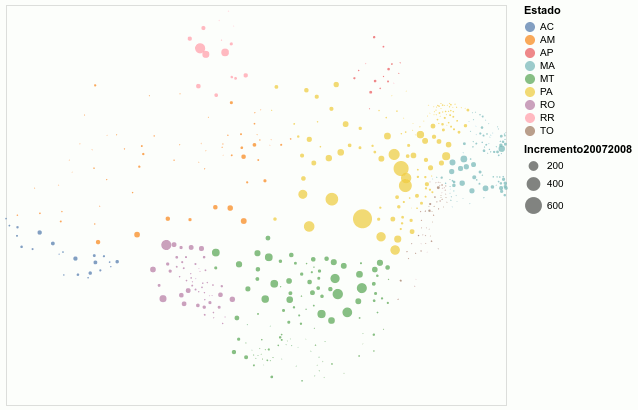

In [ ]:
def geoplot(Ano: int):
  return alt.Chart(df_desmat).mark_circle().encode(
    longitude='Long:Q',
    latitude='Lat:Q',
    color='Estado:N',
    size=f'Incremento{Ano-1}{Ano}',
    tooltip='Municipio'
  ).project(
      "mercator"
  ).properties(
      width=500,
      height=400
  )

interact(geoplot, Ano=(2008,2019), continuous_update=False)

interactive(children=(IntSlider(value=2013, description='Ano', max=2019, min=2008), Output()), _dom_classes=('…

<function __main__.geoplot>